# Zero to Hero

## 2.01 Optimizacion Bayesiana

In [ ]:
El objetivo es mostrar como funciona la Optimizacion Bayesiana en el caso mas simple : una funcion univariada

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [18]:
install.packages("mlrMBO")
install.packages("DiceKriging")

Warning message:
"package 'mlrMBO' is in use and will not be installed"
Installing package into 'C:/Users/Null/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'DiceKriging' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Null\AppData\Local\Temp\Rtmp8oCuuA\downloaded_packages


In [19]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2067676,110.5,4216865,225.3,4216865,225.3
Vcells,3561886,27.2,8388608,64.0,8378504,64.0


Loading required package: DiceKriging


Attaching package: 'DiceKriging'


The following object is masked from 'package:checkmate':

    checkNames




### Defino la funcion a optimizar, un polinomio de grado 4

In [20]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

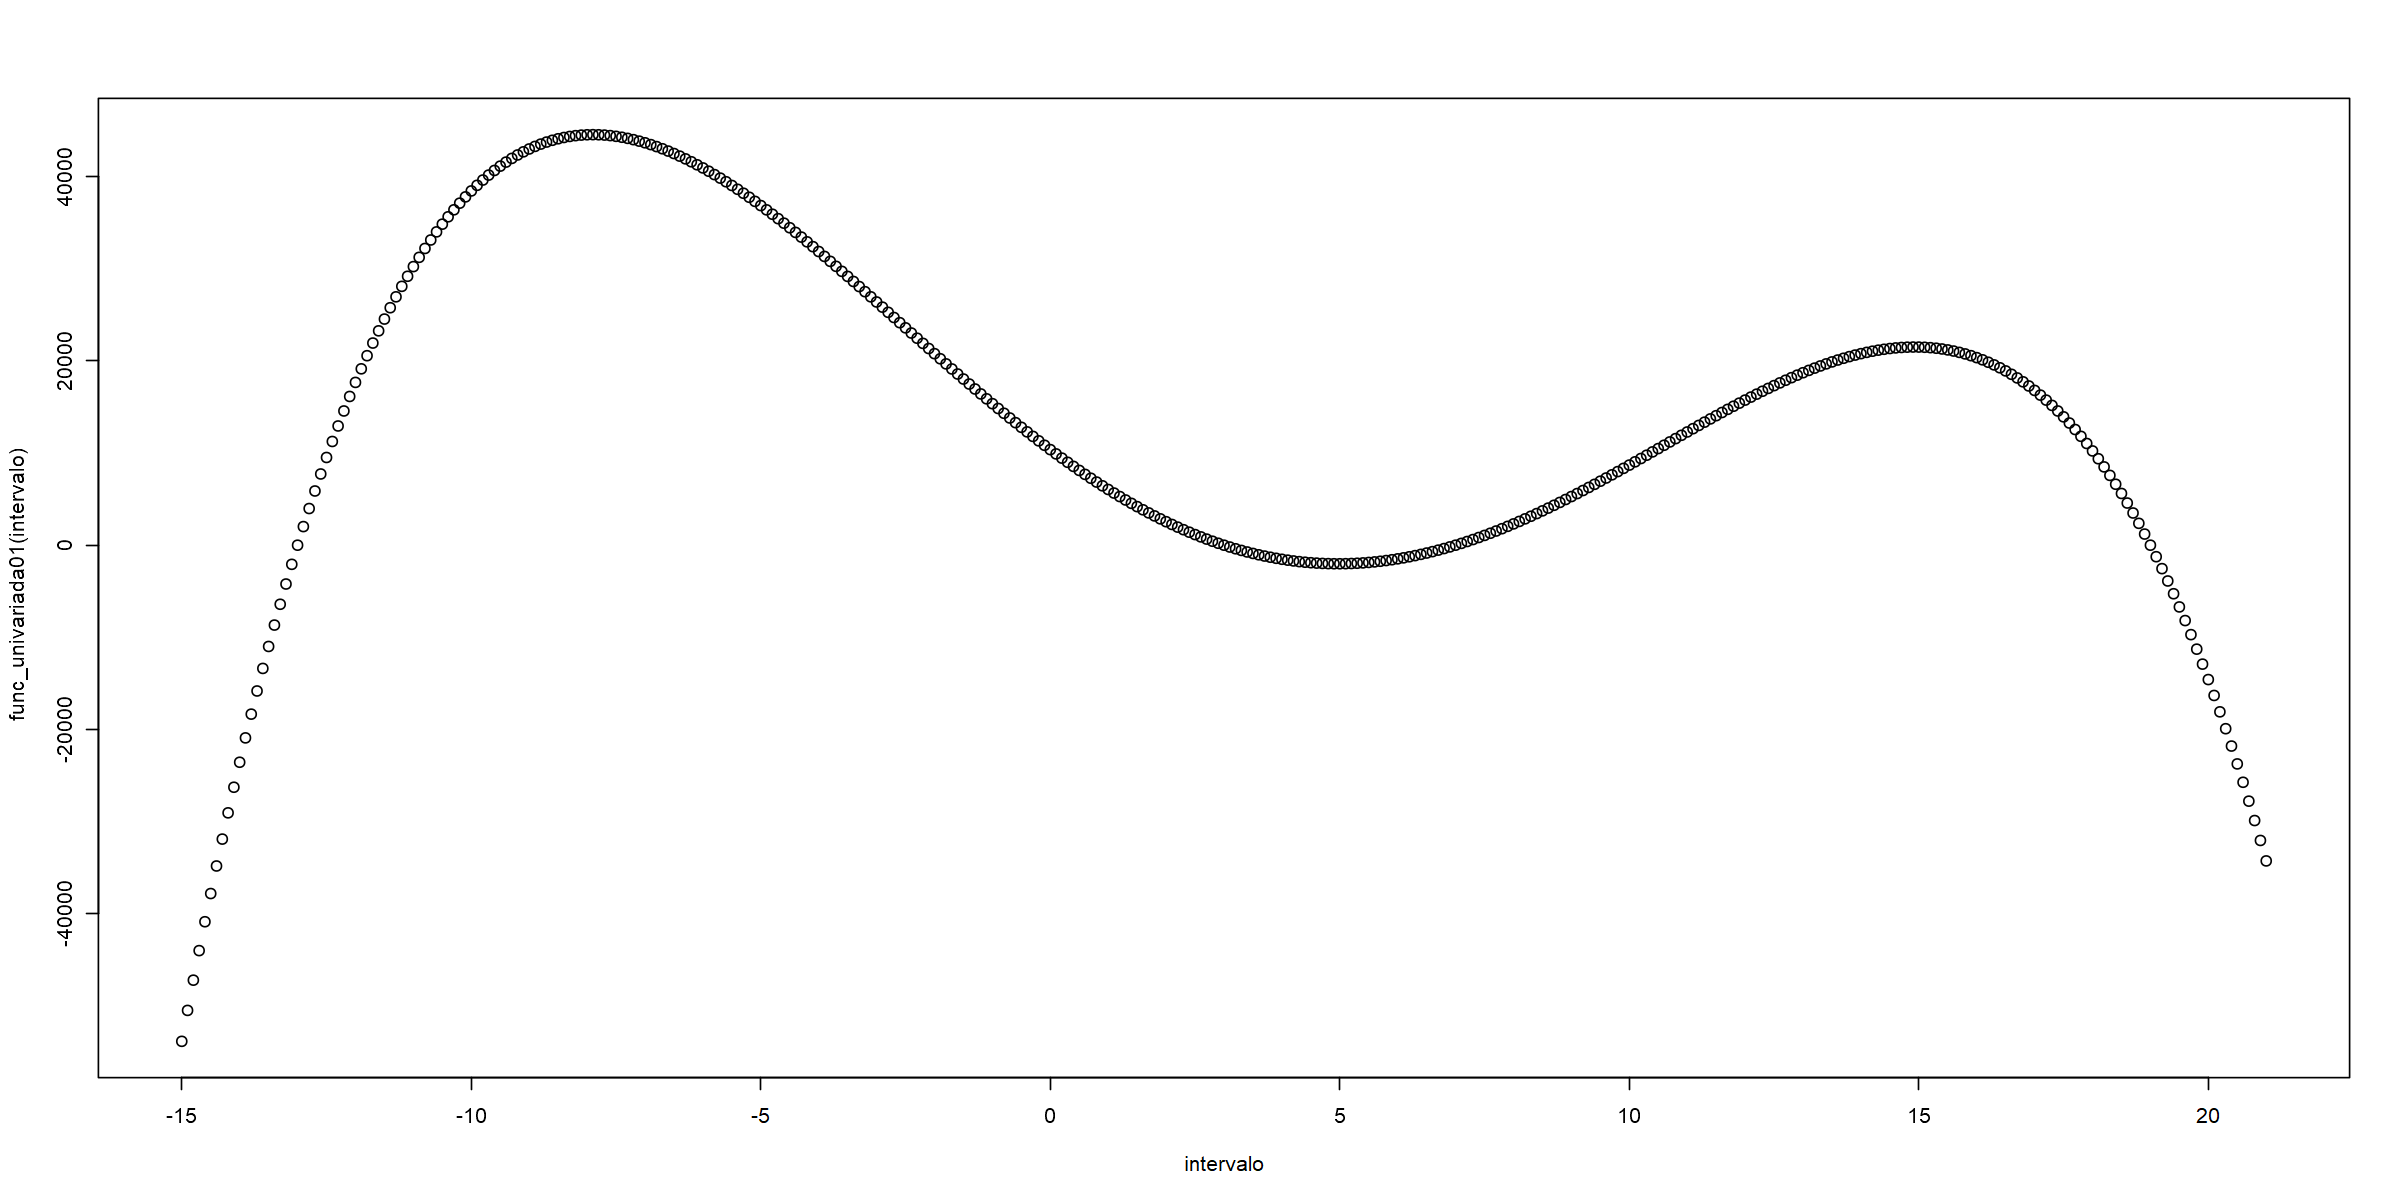

In [21]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [22]:
obj.fun  <- makeSingleObjectiveFunction( fn= func_univariada01, 
            minimize= FALSE, #estoy Maximizando la ganancia
            par.set=  makeParamSet( makeNumericParam( "x", lower= -100, upper=  100))
            ) 

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [23]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [24]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [25]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=-14.1 : y = -2.54e+04 : 0.0 secs : initdesign

[mbo] 0: x=-50.3 : y = -1.58e+07 : 0.0 secs : initdesign

[mbo] 0: x=96.3 : y = -1.41e+08 : 0.0 secs : initdesign

[mbo] 0: x=16.6 : y = 1.84e+04 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  293.1684 
  - best initial criterion value(s) :  -76.44721 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       76.447  |proj g|=   2.2599e-05
At iterate     1  f =       76.447  |proj g|=    2.2593e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.25932e-05
final function value 76.4472

F = 76.4472
final  value 76.447209 
converged


[mbo] 1: x=2.71 : y = 646 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  293.1684 
  - best initial criterion value(s) :  -93.3999 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=         93.4  |proj g|=    0.0051811
At iterate     1  f =         93.4  |proj g|=     0.0051794
At iterate     2  f =       93.354  |proj g|=     0.0011862
At iterate     3  f =        93.35  |proj g|=    0.00035523
At iterate     4  f =        93.35  |proj g|=    3.7291e-05
At iterate     5  f =        93.35  |proj g|=    1.3464e-06
At iterate     6  f =        93.35  |proj g|=    5.3482e-09

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
nor

[mbo] 2: x=-100 : y = -2.28e+08 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -116.2231 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       116.22  |proj g|=    0.0030465
At iterate     1  f =       116.22  |proj g|=      0.003046
At iterate     2  f =        116.2  |proj g|=     0.0020029
At iterate     3  f =        116.2  |proj g|=    0.00058345
At iterate     4  f =        116.2  |proj g|=    8.3745e-05
At iterate     5  f =        116.2  |proj g|=    4.2838e-06
At iterate     6  f =        116.2  |proj g|=    2.9519e-08

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 3: x=-32 : y = -2.66e+06 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -133.7732 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       133.77  |proj g|=    0.0039158
At iterate     1  f =       133.77  |proj g|=     0.0039147
At iterate     2  f =       133.74  |proj g|=     0.0008316
At iterate     3  f =       133.74  |proj g|=     0.0002248
At iterate     4  f =       133.74  |proj g|=    1.8695e-05
At iterate     5  f =       133.74  |proj g|=    4.6746e-07
At iterate     6  f =       133.74  |proj g|=    1.0032e-09

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 4: x=34.8 : y = -1.34e+06 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -151.8331 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       151.83  |proj g|=   0.00033596
At iterate     1  f =       151.83  |proj g|=    0.00033593

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.00033593
final function value 151.833

F = 151.833
final  value 151.833101 
converged


[mbo] 5: x=26.3 : y = -2.55e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -168.0343 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       168.03  |proj g|=    0.0006164
At iterate     1  f =       168.03  |proj g|=    0.00061635
At iterate     2  f =       168.03  |proj g|=    5.2191e-05
At iterate     3  f =       168.03  |proj g|=    4.9014e-06
At iterate     4  f =       168.03  |proj g|=    4.4062e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.40623e-08
final function value 168.032

F = 168.032
final  value 168.031691 
conver

[mbo] 6: x=-5.94 : y = 4.08e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -183.8482 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       183.85  |proj g|=   0.00080446
At iterate     1  f =       183.85  |proj g|=    0.00080441
At iterate     2  f =       183.84  |proj g|=    9.5826e-05
At iterate     3  f =       183.84  |proj g|=    1.3176e-05
At iterate     4  f =       183.84  |proj g|=    2.5899e-07
At iterate     5  f =       183.84  |proj g|=    7.1756e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 7.17565e-10
final functio

[mbo] 7: x=9.79 : y = 7.97e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -199.2044 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        199.2  |proj g|=   0.00023822
At iterate     1  f =        199.2  |proj g|=    0.00023821

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000238212
final function value 199.204

F = 199.204
final  value 199.204396 
converged


[mbo] 8: x=-21.4 : y = -4.7e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -214.8208 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       214.82  |proj g|=   7.8003e-06
At iterate     1  f =       214.82  |proj g|=    7.8001e-06

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 7.80012e-06
final function value 214.821

F = 214.821
final  value 214.820820 
converged


[mbo] 9: x=-1.71 : y = 1.92e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -229.3514 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       229.35  |proj g|=   0.00011389
At iterate     1  f =       229.35  |proj g|=    0.00011388

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000113884
final function value 229.351

F = 229.351
final  value 229.351441 
converged


[mbo] 10: x=21.1 : y = -3.56e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -243.9637 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       243.96  |proj g|=   2.3874e-05
At iterate     1  f =       243.96  |proj g|=    2.3874e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.38736e-05
final function value 243.964

F = 243.964
final  value 243.963697 
converged


[mbo] 11: x=-10 : y = 3.84e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -258.2422 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       258.24  |proj g|=   0.00020865
At iterate     1  f =       258.24  |proj g|=    0.00020864

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000208644
final function value 258.242

F = 258.242
final  value 258.242171 
converged


[mbo] 12: x=6.34 : y = -1.08e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -272.285 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       272.29  |proj g|=   0.00044081
At iterate     1  f =       272.29  |proj g|=     0.0004408

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000440804
final function value 272.285

F = 272.285
final  value 272.285004 
converged


[mbo] 13: x=13.3 : y = 1.94e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -286.1987 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        286.2  |proj g|=   0.00090869
At iterate     1  f =        286.2  |proj g|=    0.00090868
At iterate     2  f =        286.2  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 286.195

F = 286.195
final  value 286.195261 
converged


[mbo] 14: x=-17.3 : y = -1.56e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -300.2502 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       300.25  |proj g|=    0.0015769
At iterate     1  f =       300.25  |proj g|=     0.0015769
At iterate     2  f =       300.23  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 300.23

F = 300.23
final  value 300.230470 
converged


[mbo] 15: x=30.2 : y = -6.07e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -314.6708 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       314.67  |proj g|=    0.0023427
At iterate     1  f =       314.67  |proj g|=     0.0023426
At iterate     2  f =       314.62  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 314.619

F = 314.619
final  value 314.619100 
converged


[mbo] 16: x=-7.97 : y = 4.46e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -327.766 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       327.77  |proj g|=    0.0022235
At iterate     1  f =       327.77  |proj g|=     0.0022235
At iterate     2  f =       327.76  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 327.763

F = 327.763
final  value 327.762852 
converged


[mbo] 17: x=-3.82 : y = 3.09e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -340.8952 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        340.9  |proj g|=    0.0027842
At iterate     1  f =        340.9  |proj g|=     0.0027841
At iterate     2  f =       340.88  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 340.881

F = 340.881
final  value 340.880992 
converged


[mbo] 18: x=18.8 : y = 2.87e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -354.1666 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       354.17  |proj g|=    0.0038246
At iterate     1  f =       354.17  |proj g|=     0.0038245
At iterate     2  f =       354.09  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 354.087

F = 354.087
final  value 354.086612 
converged


[mbo] 19: x=0.501 : y = 8.11e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -367.2294 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       367.23  |proj g|=    0.0037721
At iterate     1  f =       367.23  |proj g|=      0.003772
At iterate     2  f =        367.2  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 367.204

F = 367.204
final  value 367.204476 
converged


[mbo] 20: x=-11.9 : y = 1.89e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -380.2039 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        380.2  |proj g|=    0.0042871
At iterate     1  f =        380.2  |proj g|=     0.0042869
At iterate     2  f =       380.17  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 380.171

F = 380.171
final  value 380.170623 
converged


[mbo] 21: x=11.6 : y = 1.43e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -393.1285 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       393.13  |proj g|=    0.0058033
At iterate     1  f =       393.13  |proj g|=      0.005803
At iterate     2  f =       392.96  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 392.96

F = 392.96
final  value 392.960265 
converged


[mbo] 22: x=15 : y = 2.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -405.7029 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        405.7  |proj g|=    0.0058041
At iterate     1  f =        405.7  |proj g|=     0.0058039
At iterate     2  f =       405.59  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 405.588

F = 405.588
final  value 405.588138 
converged


[mbo] 23: x=23.3 : y = -1.05e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -419.0601 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       419.06  |proj g|=    0.0070924
At iterate     1  f =       419.06  |proj g|=      0.007092
At iterate     2  f =       418.83  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 418.832

F = 418.832
final  value 418.832379 
converged


[mbo] 24: x=4.55 : y = -1.93e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -431.6006 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        431.6  |proj g|=    0.0059581
At iterate     1  f =        431.6  |proj g|=     0.0059578
At iterate     2  f =       431.58  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 431.584

F = 431.584
final  value 431.584341 
converged


[mbo] 25: x=8.09 : y = 2.56e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  392.5907 
  - best initial criterion value(s) :  -444.2249 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       444.22  |proj g|=    0.0065838
At iterate     1  f =       444.22  |proj g|=     0.0065835
At iterate     2  f =       444.18  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 444.184

F = 444.184
final  value 444.184228 
converged


In [26]:
tb_resultados  <- as.data.table( run$opt.path )

In [27]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-14.0678314,-2.539432e+04,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
-50.2885889,-1.577502e+07,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
96.2956034,-1.407598e+08,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
16.6316455,1.842813e+04,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
2.7059621,6.462378e+02,1,NA,NA,0,-6254283.81,NA,0.03,infill_ei,0.11,8994801.6,4.483610e+06
-99.9997489,-2.281986e+08,2,NA,NA,0,-3574031.32,NA,0.01,infill_ei,0.13,41860168.3,-4.130229e+07
-32.0497164,-2.662038e+06,3,NA,NA,0,-9263761.80,NA,0.00,infill_ei,0.28,17913077.9,3.916334e+06
34.8319816,-1.341811e+06,4,NA,NA,0,-2624547.66,NA,0.02,infill_ei,0.11,22715094.1,-1.866157e+07
26.2521580,-2.548611e+05,5,NA,NA,0,-2350265.52,NA,0.02,infill_ei,0.10,4418459.1,1.090308e+06


In [28]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.969753,44556.16,16,NA,NA,0,-84189.97,NA,0.02,infill_ei,0.12,206436.1,44396.8


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?